# PROJECT : TITANIC

In [1]:
#importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
#import the dataset
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

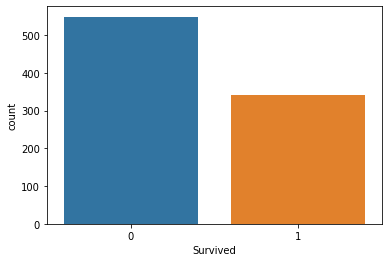

In [7]:
sns.countplot(x = 'Survived', data = train_dataset)

In [8]:
train_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### working with missing value

In [9]:
#convert male and female to 0 , 1
train_dataset["Sex"] = train_dataset["Sex"].map({"male": 0, "female":1})
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# fill the missing value of Embarked with 'S',because it has only 2 missing value
train_dataset["Embarked"] = train_dataset["Embarked"].fillna("S")

In [12]:
train_dataset["Embarked"] = train_dataset["Embarked"].map({"C": 0, "Q":1 , "S":2})

In [13]:
# fill the missing value of Fare with median value ,because it has only 1 missing value
train_dataset["Fare"] = train_dataset["Fare"].fillna(train_dataset["Fare"].median())

In [14]:
print(round(100*(train_dataset.isnull().sum() / len(train_dataset.index)) , 2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.00
dtype: float64


In [15]:
train_dataset = train_dataset[~np.isnan(train_dataset['Survived'])]

Though Survival is out output column,So it can be fll-up with any random value.So delete the missing rows.

In [16]:
train_dataset.shape

(891, 12)

### Visualize the dataset

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


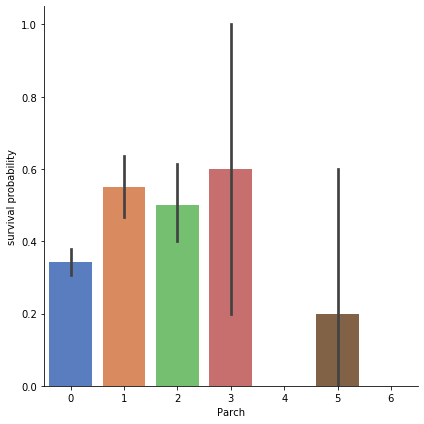

In [17]:
g  = sns.factorplot(x="Parch" , y="Survived" , data=train_dataset , kind = "bar" , size = 6 , palette = "muted");
g.despine(left=False);
g = g.set_ylabels("survival probability");

Parch means parent and their children.The bar is indicates that parent and children ar survived most.Who have more children their survied accuracy is bigger than others.

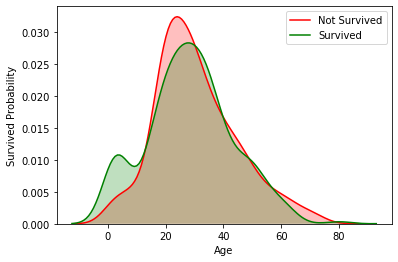

In [18]:
g = sns.kdeplot(train_dataset["Age"][(train_dataset["Survived"] == 0) & (train_dataset["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_dataset["Age"][(train_dataset["Survived"] == 1) & (train_dataset["Age"].notnull())], ax =g, color="green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Survived Probability")
g = g.legend(["Not Survived","Survived"])

The older people survive accuracy is very low.On the age of 80 it become 0.The age between 20-40 are survived most

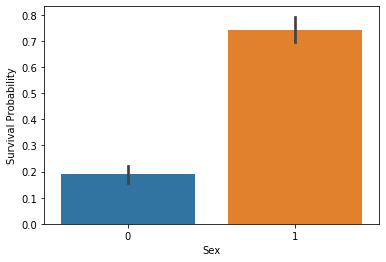

In [19]:
g = sns.barplot(x="Sex",y="Survived",data=train_dataset)
g = g.set_ylabel("Survival Probability")

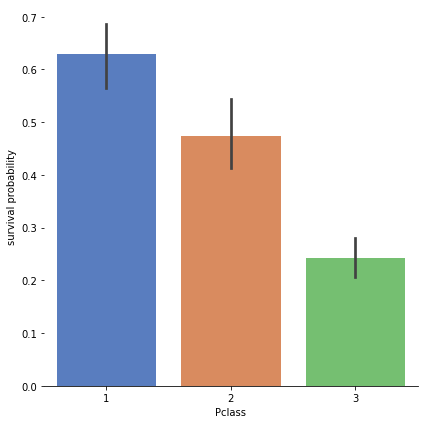

In [20]:
g = sns.factorplot(x = "Pclass" , y = "Survived",data = train_dataset , kind = "bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

The 1st class cavin passengers have most suvival amount.2nd and 3rd class passengers are lowest from 1st class.

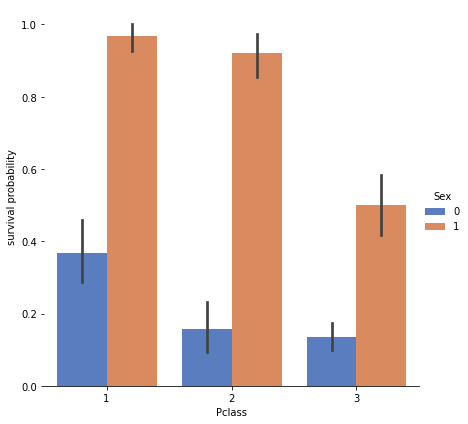

In [21]:
g = sns.factorplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_dataset , size = 6, kind = "bar", palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

This is mainly Cavin-Class with their Gender.Female passenger are suvive most in all the class.

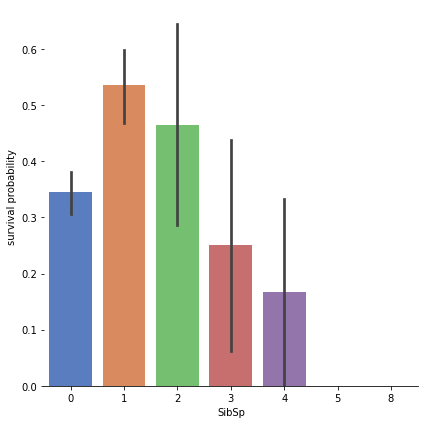

In [22]:
g = sns.factorplot(x = "SibSp" , y = "Survived",data = train_dataset , kind = "bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability");

Sibsp means sibling ans spouse.Those who have more sibling like brother,sister,father,mother and spouse both category have very low chance to survive.

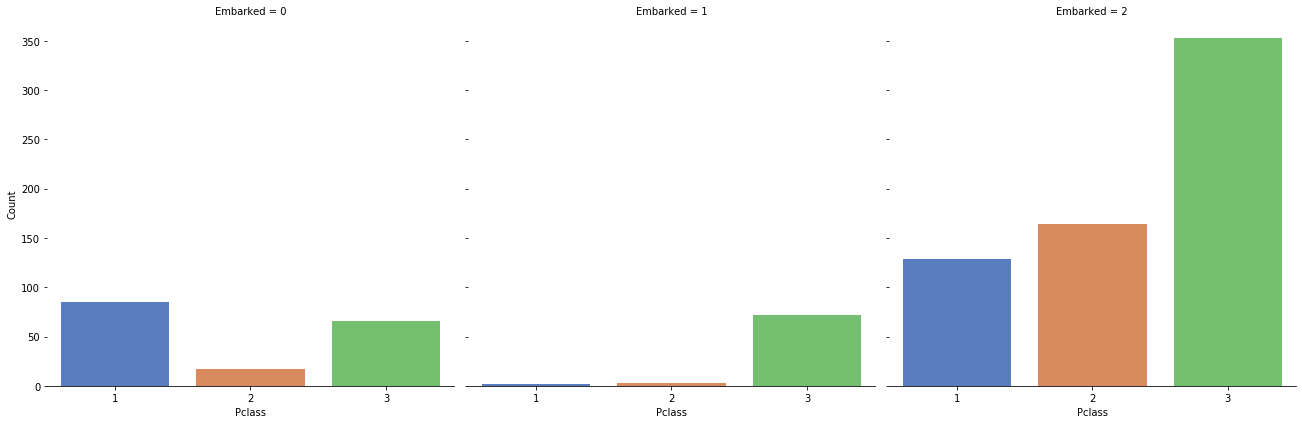

In [23]:
g = sns.factorplot("Pclass", col="Embarked",  data=train_dataset,size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count" , )

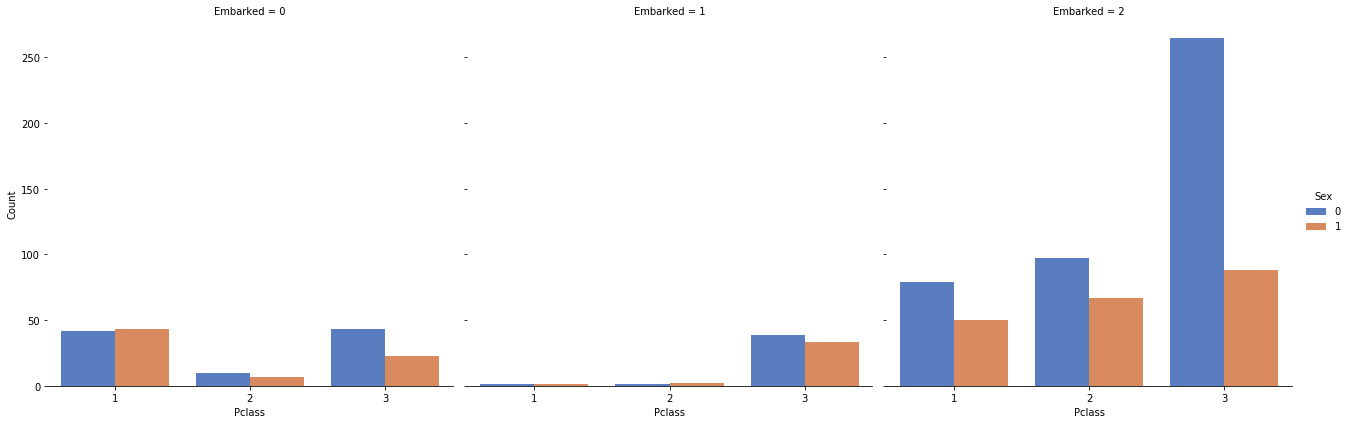

In [24]:
g = sns.factorplot("Pclass", col="Embarked", hue = 'Sex' , data=train_dataset,size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count" , )

1st class passengers got more facility than other class passengers both male and female also.

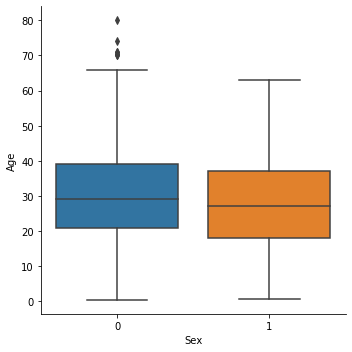

In [25]:
g = sns.factorplot(y="Age",x="Sex",data=train_dataset,kind="box");

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


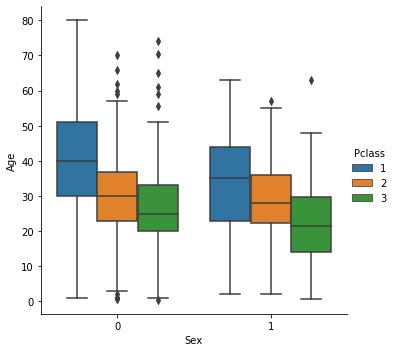

In [26]:
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=train_dataset,kind="box");

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


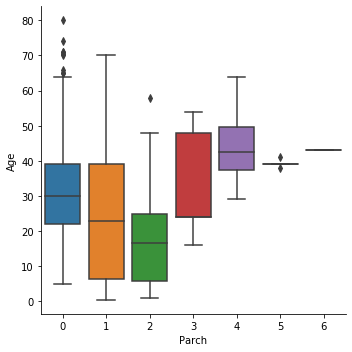

In [27]:
g = sns.factorplot(y="Age" , x = "Parch", data=train_dataset,kind="box");

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


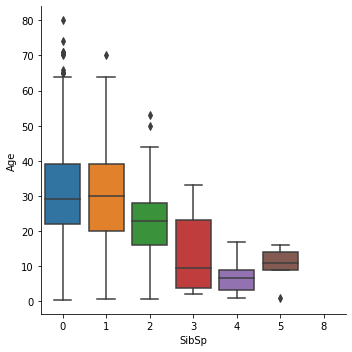

In [28]:
g = sns.factorplot(y="Age",x="SibSp", data=train_dataset,kind="box");

### Work with Age column.

In [29]:
index_NaN_age = list(train_dataset["Age"][train_dataset["Age"].isnull()].index)
for i in index_NaN_age :
    age_med = train_dataset["Age"].median()
    age_pred = train_dataset["Age"][((train_dataset['SibSp'] == train_dataset.iloc[i]["SibSp"]) & 
                                     (train_dataset['Parch'] == train_dataset.iloc[i]["Parch"]) & 
                                     (train_dataset['Pclass'] == train_dataset.iloc[i]["Pclass"]))].median()
    
    if not np.isnan(age_pred) :
        train_dataset['Age'].iloc[i] = age_pred
    else :
        train_dataset['Age'].iloc[i] = age_med;

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


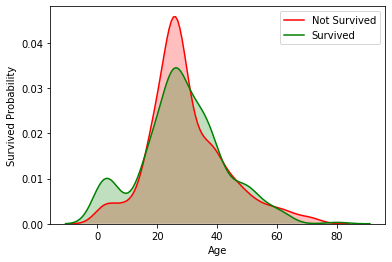

In [31]:
g = sns.kdeplot(train_dataset["Age"][(train_dataset["Survived"] == 0) & (train_dataset["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_dataset["Age"][(train_dataset["Survived"] == 1) & (train_dataset["Age"].notnull())], ax =g, color="green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Survived Probability")
g = g.legend(["Not Survived","Survived"]);

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result e

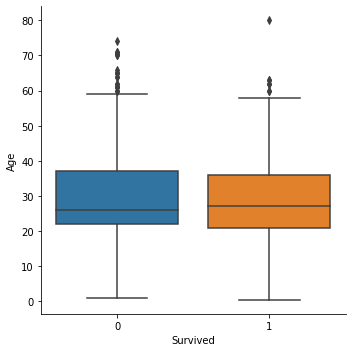

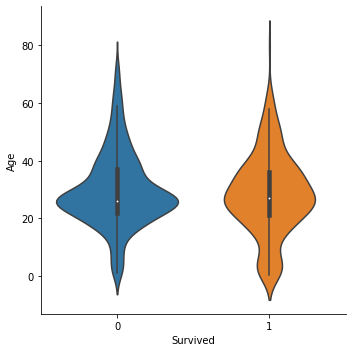

In [32]:
g = sns.factorplot(x="Survived", y = "Age",data = train_dataset, kind="box");
g = sns.factorplot(x="Survived", y = "Age",data = train_dataset, kind="violin");

In [33]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


### work with Name column

In [34]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_dataset["Name"]]
train_dataset["Title"] = pd.Series(dataset_title)
train_dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

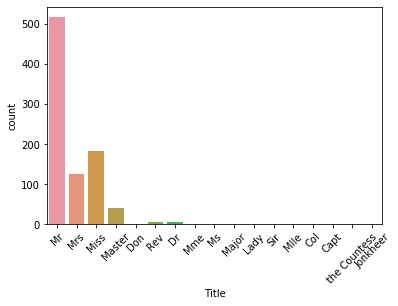

In [35]:
g = sns.countplot(x="Title",data = train_dataset)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [36]:
train_dataset["Title"] = train_dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_dataset["Title"] = train_dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train_dataset["Title"] = train_dataset["Title"].astype(int)

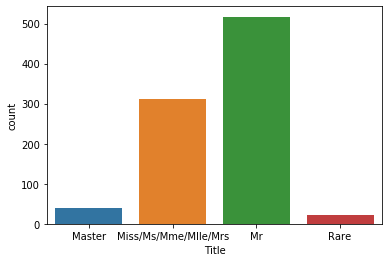

In [37]:
g = sns.countplot(train_dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

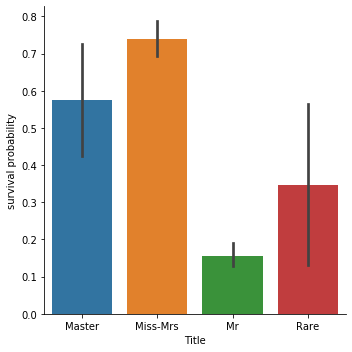

In [38]:
g = sns.factorplot(x = "Title" , y = "Survived",data = train_dataset , kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability");

In [39]:
train_dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [40]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Working with Sibsp

In [41]:
train_dataset["Fsize"] = train_dataset["SibSp"] + train_dataset["Parch"] + 1

In [42]:
train_dataset['Single'] = train_dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
train_dataset['SmallF'] = train_dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
train_dataset['MedF'] = train_dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
train_dataset['LargeF'] = train_dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

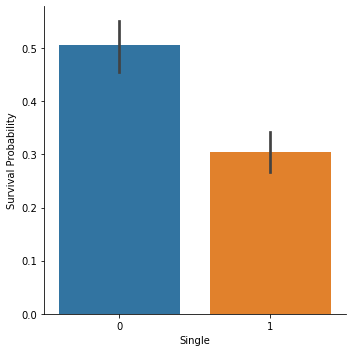

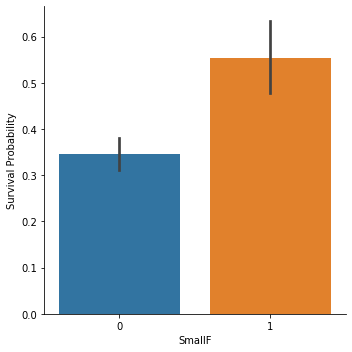

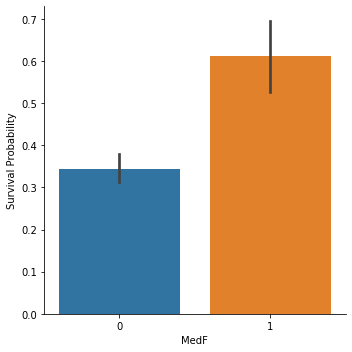

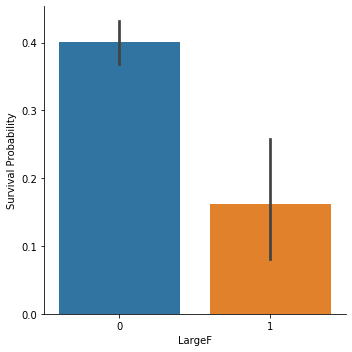

In [43]:
g = sns.factorplot(x="Single",y="Survived",data=train_dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=train_dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=train_dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=train_dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

### Working with CABIN column

In [44]:
train_dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_dataset['Cabin'] ])

In [45]:
np.unique(train_dataset['Cabin'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'], dtype=object)

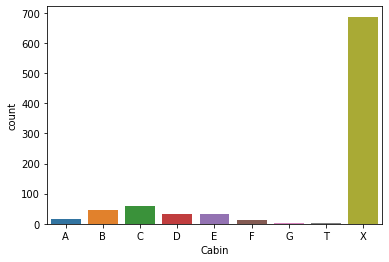

In [46]:
g = sns.countplot(train_dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

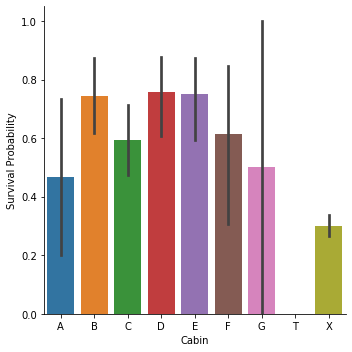

In [47]:
g = sns.factorplot(y="Survived",x="Cabin",data=train_dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [48]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Cabin"],prefix="Cabin")

In [49]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Single         0
SmallF         0
MedF           0
LargeF         0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_T        0
Cabin_X        0
dtype: int64

In [50]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 25 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int32
Fsize          891 non-null int64
Single         891 non-null int64
SmallF         891 non-null int64
MedF           891 non-null int64
LargeF         891 non-null int64
Cabin_A        891 non-null uint8
Cabin_B        891 non-null uint8
Cabin_C        891 non-null uint8
Cabin_D        891 non-null uint8
Cabin_E        891 non-null uint8
Cabin_F        891 non-null uint8
Cabin_G        891 non-null uint8
Cabin_T        891 non-null uint8
Cabin_X        891 non-null uint8
dtypes: float64(2), int32(1), int64(12),

In [51]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,LargeF,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,0,35.0,0,0,373450,8.0500,2,...,0,0,0,0,0,0,0,0,0,1


### working with Ticket column

In [52]:
Ticket = []
for i in list(train_dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
train_dataset["Ticket"] = Ticket
train_dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [53]:
train_dataset = pd.get_dummies(train_dataset, columns = ["Ticket"] , prefix="T")

In [54]:
train_dataset.shape

(891, 55)

In [55]:
train_dataset["Pclass"] = train_dataset["Pclass"].astype("category")
train_dataset = pd.get_dummies(train_dataset, columns = ["Pclass"] , prefix="Pc")

In [56]:
train_dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [57]:
train_dataset.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Fsize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC',
       'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4',
       'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP',
       'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2',
       'T_SWPP', 'T_WC', 'T_WEP', 'T_X', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [58]:
#train_dataset = train_dataset.drop(['Ticket'] , axis = 1)

In [59]:
train_dataset.shape

(891, 56)

In [60]:
train_dataset.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,Single,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0,0,22.0,1,0,7.2500,2,2,2,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,2,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,1,2,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,2,2,1,1,...,0,0,0,0,0,0,1,0,0,1
5,0,0,26.0,0,0,8.4583,1,2,1,1,...,0,0,0,0,0,0,1,0,0,1
6,0,0,54.0,0,0,51.8625,2,2,1,1,...,0,0,0,0,0,0,1,1,0,0
7,0,0,2.0,3,1,21.0750,2,0,5,0,...,0,0,0,0,0,0,1,0,0,1
8,1,1,27.0,0,2,11.1333,2,1,3,0,...,0,0,0,0,0,0,1,0,0,1
9,1,1,14.0,1,0,30.0708,0,1,2,0,...,0,0,0,0,0,0,1,0,1,0


### Correlation Matrix

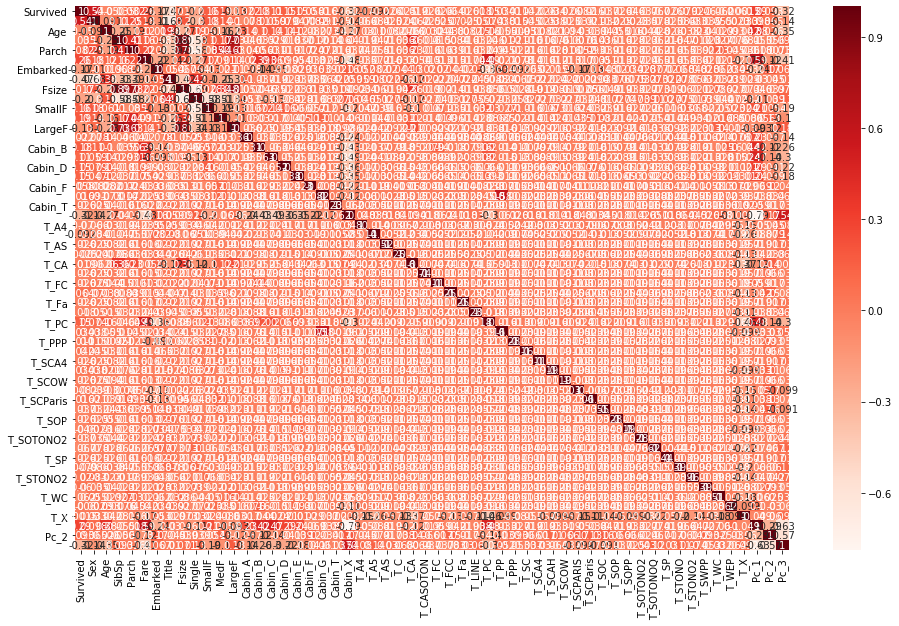

In [61]:
plt.figure(figsize = (16,10)) 
sns.heatmap(train_dataset.corr() , annot = True , cmap = 'Reds')

In [62]:
print(train_dataset.shape)
print(test_dataset.shape)

(891, 56)
(418, 11)


## ML algorithm

### Logistic Regression

In [63]:
x = train_dataset.drop(['Survived'] , axis = 1)
y = train_dataset['Survived']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 90)

In [64]:
x_train.shape

(712, 55)

In [65]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [66]:
lr = LogisticRegression()
lr.fit(x_train , y_train);

In [67]:
y_pred_lr = lr.predict(x_test)
ac = accuracy_score(y_test , y_pred_lr)
print(ac*100);
confusion_matrix(y_test , y_pred_lr)

83.24022346368714


array([[105,  18],
       [ 12,  44]], dtype=int64)

### KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train , y_train)

y_pred_knn = knn.predict(x_test)

In [69]:
ac = accuracy_score(y_test , y_pred_knn)
print(ac*100)

79.3296089385475


In [70]:
n_folds = 5
parameters = {
        'n_neighbors': range (2 , 50 , 2)
        }

knn = KNeighborsClassifier()

tree = GridSearchCV(estimator = knn , param_grid = parameters , return_train_score = True , cv = n_folds , n_jobs = -1)
tree.fit(x_train , y_train)

score_knn = tree.cv_results_

print(pd.DataFrame(score_knn).head())
print(tree.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012369      0.001961         0.017860        0.007841   
1       0.010674      0.000741         0.014960        0.003154   
2       0.012565      0.004117         0.015161        0.002034   
3       0.017151      0.008427         0.013564        0.001197   
4       0.011168      0.001467         0.017354        0.003546   

  param_n_neighbors               params  split0_test_score  \
0                 2   {'n_neighbors': 2}           0.741259   
1                 4   {'n_neighbors': 4}           0.797203   
2                 6   {'n_neighbors': 6}           0.825175   
3                 8   {'n_neighbors': 8}           0.811189   
4                10  {'n_neighbors': 10}           0.811189   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.741259           0.760563           0.711268  ...   
1           0.748252           0.767606           0.746479  ...   
2           0.783

In [71]:
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(x_train , y_train)

y_pred_knn = knn.predict(x_test)
ac = accuracy_score(y_test , y_pred_knn)
print(ac*100)

83.24022346368714


### SVM

In [72]:
sv = SVC()
sv.fit(x_train , y_train)

y_pred_svm = sv.predict(x_test)

ac_svr = accuracy_score(y_test , y_pred_svm)
print(ac_svr*100)

81.56424581005587


In [73]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
params = {"C": [0.01 , 0.1, 1, 10, 100, 1000]}

model = SVC()
model_cv_C = GridSearchCV(estimator = model, param_grid = params , cv = folds , verbose = 1 , return_train_score=True , n_jobs = -1)
model_cv_C.fit(x_train, y_train) 


cv_results = pd.DataFrame(model_cv_C.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049587,0.022122,0.009574,0.001620,0.01,{'C': 0.01},0.580420,0.545455,0.640845,0.563380,...,0.598414,0.045157,6,0.602812,0.611599,0.587719,0.607018,0.582456,0.598321,0.011280
1,0.070305,0.022886,0.018152,0.011093,0.1,{'C': 0.1},0.776224,0.769231,0.795775,0.767606,...,0.787964,0.023728,3,0.811951,0.794376,0.789474,0.807018,0.808772,0.802318,0.008770
2,0.069533,0.016260,0.009377,0.005337,1,{'C': 1},0.776224,0.797203,0.852113,0.767606,...,0.803418,0.031155,2,0.859402,0.847100,0.836842,0.852632,0.849123,0.849020,0.007387
3,0.067620,0.009720,0.012170,0.008499,10,{'C': 10},0.769231,0.797203,0.859155,0.767606,...,0.803428,0.034692,1,0.885764,0.873462,0.866667,0.882456,0.871930,0.876056,0.007030
4,0.086169,0.002999,0.010972,0.007108,100,{'C': 100},0.748252,0.776224,0.774648,0.774648,...,0.778135,0.022017,4,0.905097,0.903339,0.905263,0.892982,0.901754,0.901687,0.004537
5,0.144227,0.036877,0.006982,0.002274,1000,{'C': 1000},0.734266,0.741259,0.781690,0.774648,...,0.771161,0.032139,5,0.934974,0.919156,0.922807,0.912281,0.921053,0.922054,0.007381


In [74]:
model_cv_C.best_params_

{'C': 10}

In [75]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
gamma = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model = SVC()

model_cv_g = GridSearchCV(estimator = model, param_grid = gamma, cv = folds , verbose = 1 , return_train_score=True)
model_cv_g.fit(x_train, y_train) 

model_cv_g.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.6s finished


{'gamma': 0.001}

In [76]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
kernels = {'kernel': ['rbf' , 'poly' , 'sigmoid']}  

model = SVC()

model_cv_k = GridSearchCV(estimator = model, param_grid = kernels, cv = folds , return_train_score=True)
model_cv_k.fit(x_train, y_train) 


model_cv_k.best_params_

{'kernel': 'sigmoid'}

In [77]:
sv = SVC(C = 10 , gamma = 0.001 , kernel = 'sigmoid')
sv.fit(x_train , y_train)

y_pred_svm = sv.predict(x_test)

ac_svr = accuracy_score(y_test , y_pred_svm)
print(ac_svr*100)

82.12290502793296


### Decision Tree

In [78]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
y_dt = dt.predict(x_test)
ac_dt = accuracy_score(y_test , y_dt)
ac_dt

0.8212290502793296

In [79]:
n_folds = 5

In [80]:
parameters = {'min_samples_split': range(5, 200, 10)}

dtree = DecisionTreeClassifier(random_state = 100)

tree_split = GridSearchCV(dtree, parameters , cv=n_folds , return_train_score = True , n_jobs = -1)
tree_split.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': range(5, 200, 10)},
             pr

In [81]:
parameters = {
        'min_samples_leaf': range (1 , 20),
        'max_depth':range (1,20)
        }

dt = DecisionTreeClassifier()

tree_two = GridSearchCV(dt , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)
tree_two.fit(x_train , y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'mi

In [82]:
print(tree_two.best_params_)
print(tree_split.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1}
{'min_samples_split': 75}


In [83]:
dt = DecisionTreeClassifier(max_depth = 3 , min_samples_leaf = 2 , min_samples_split = 75)
dt.fit(x_train , y_train)


y_pred_dt = dt.predict(x_test)

ac_dt = accuracy_score(y_test , y_dt)
ac_dt

0.8212290502793296

### Random Forest

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

y_pred_rf = rf.predict(x_test)

ac_rf = accuracy_score(y_test , y_pred_rf)
print(ac_rf*100)

81.00558659217877


In [85]:
n_folds = 5
parameters = {'max_features':range(1 , 52 , 1)}

rf = RandomForestClassifier(random_state = 100)
grd_search_max_ft = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_max_ft.fit(x_train, y_train)
print('Best parameter for max_depth: ',grd_search_max_ft.best_params_)


Best parameter for max_depth:  {'max_features': 28}


In [86]:
scores = grd_search_max_ft.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.240397,0.011821,0.017154,0.001716,1,{'max_features': 1},0.832168,0.811189,0.795775,0.809859,...,0.808953,0.013357,49,0.991213,0.99297,0.989474,0.992982,0.992982,0.991924,0.001403
1,0.239987,0.014100,0.024040,0.007437,2,{'max_features': 2},0.818182,0.804196,0.788732,0.823944,...,0.808983,0.012184,48,0.991213,0.99297,0.989474,0.994737,0.992982,0.992275,0.001790
2,0.243271,0.005203,0.020343,0.002719,3,{'max_features': 3},0.811189,0.790210,0.795775,0.809859,...,0.799153,0.009586,51,0.991213,0.99297,0.989474,0.992982,0.992982,0.991924,0.001403
3,0.254744,0.010325,0.020848,0.001193,4,{'max_features': 4},0.839161,0.790210,0.816901,0.823944,...,0.817423,0.015850,31,0.991213,0.99297,0.989474,0.992982,0.992982,0.991924,0.001403
4,0.247156,0.003782,0.017560,0.001066,5,{'max_features': 5},0.818182,0.804196,0.795775,0.823944,...,0.808983,0.010429,47,0.991213,0.99297,0.989474,0.992982,0.991228,0.991573,0.001311


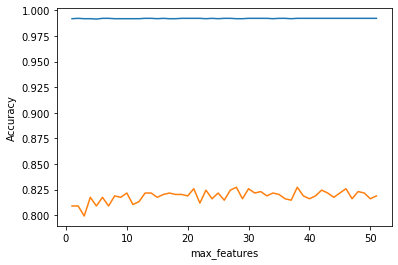

In [87]:
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

Best parameter for max_depth:  {'max_depth': 6}


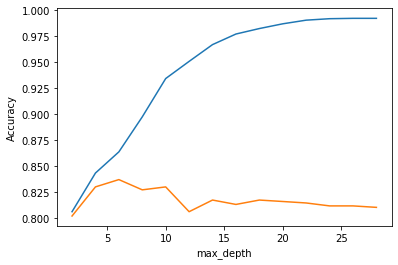

In [88]:
parameters = {'max_depth': range(2, 30, 2)}

rf = RandomForestClassifier(random_state = 100)
grd_search_max = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_max.fit(x_train, y_train)
print('Best parameter for max_depth: ',grd_search_max.best_params_)

scores = grd_search_max.cv_results_
pd.DataFrame(scores).head()



plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()


In [89]:
parameters = {'n_estimators': range(50, 500, 50)}

rf = RandomForestClassifier(random_state = 100)
grd_search_est = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_est.fit(x_train, y_train)
print('Best parameter for n_estimators: ',grd_search_est.best_params_)

scores = grd_search_est.cv_results_
pd.DataFrame(scores).head()

Best parameter for n_estimators:  {'n_estimators': 350}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.175731,0.032117,0.020345,0.015940,50,{'n_estimators': 50},0.839161,0.804196,0.802817,0.823944,...,0.808953,0.021792,8,0.989455,0.99297,0.987719,0.992982,0.991228,0.990871,0.002046
1,0.434841,0.017446,0.022933,0.006888,100,{'n_estimators': 100},0.839161,0.804196,0.802817,0.816901,...,0.808953,0.018864,9,0.991213,0.99297,0.989474,0.994737,0.992982,0.992275,0.001790
2,0.568280,0.031250,0.042885,0.009163,150,{'n_estimators': 150},0.839161,0.811189,0.802817,0.816901,...,0.811760,0.016660,7,0.991213,0.99297,0.989474,0.994737,0.992982,0.992275,0.001790
3,0.713899,0.010166,0.046868,0.003686,200,{'n_estimators': 200},0.846154,0.804196,0.809859,0.816901,...,0.814577,0.017240,6,0.991213,0.99297,0.989474,0.994737,0.992982,0.992275,0.001790
4,0.907372,0.025954,0.064032,0.019678,250,{'n_estimators': 250},0.846154,0.811189,0.802817,0.816901,...,0.815976,0.016005,4,0.991213,0.99297,0.989474,0.994737,0.992982,0.992275,0.001790


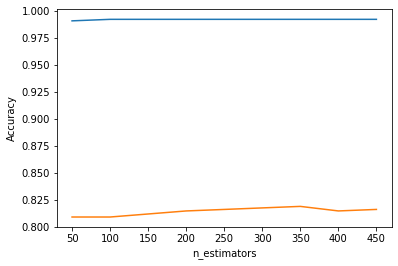

In [90]:
plt.figure()
plt.plot(scores["param_n_estimators"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_n_estimators"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


Best parameter for min_samples_leaf:  {'min_samples_leaf': 20}


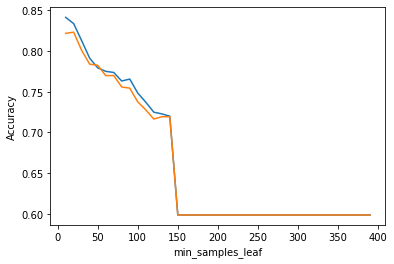

In [91]:
n_folds = 5
parameters = {'min_samples_leaf': range(10, 400, 10)}

rf = RandomForestClassifier(random_state = 100)
grd_search_lf = GridSearchCV(rf , parameters , cv = n_folds , return_train_score = True , n_jobs = -1)

grd_search_lf.fit(x_train, y_train)
print('Best parameter for min_samples_leaf: ',grd_search_lf.best_params_)

scores = grd_search_lf.cv_results_
pd.DataFrame(scores).head()



plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="Training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [92]:
parameters = {'min_samples_split': range(10, 400, 50)}

rf = RandomForestClassifier()
grd_search_sp = GridSearchCV(rf , parameters , cv = n_folds ,  return_train_score = True , n_jobs = -1)

grd_search_sp.fit(x_train, y_train)
print('Best parameter for min_samples_split: ',grd_search_sp.best_params_)

scores = grd_search_sp.cv_results_
pd.DataFrame(scores).head()


Best parameter for min_samples_split:  {'min_samples_split': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.256554,0.007833,0.019020,0.003276,10,{'min_samples_split': 10},0.839161,0.825175,0.838028,0.845070,...,0.838501,0.007274,1,0.894552,0.899824,0.903509,0.903509,0.901754,0.900630,0.003330
1,0.222874,0.014511,0.020187,0.006425,60,{'min_samples_split': 60},0.853147,0.811189,0.795775,0.852113,...,0.825825,0.022954,2,0.838313,0.843585,0.842105,0.836842,0.850877,0.842345,0.004918
2,0.203506,0.007572,0.019947,0.002360,110,{'min_samples_split': 110},0.839161,0.783217,0.788732,0.823944,...,0.807574,0.021150,3,0.836555,0.827768,0.845614,0.821053,0.833333,0.832865,0.008269
3,0.211834,0.008776,0.019547,0.002411,160,{'min_samples_split': 160},0.839161,0.762238,0.781690,0.823944,...,0.797745,0.028906,4,0.808436,0.818981,0.826316,0.805263,0.812281,0.814255,0.007568
4,0.228342,0.025478,0.021597,0.004300,210,{'min_samples_split': 210},0.804196,0.741259,0.781690,0.753521,...,0.772471,0.022404,5,0.818981,0.783831,0.789474,0.778947,0.807018,0.795650,0.015036


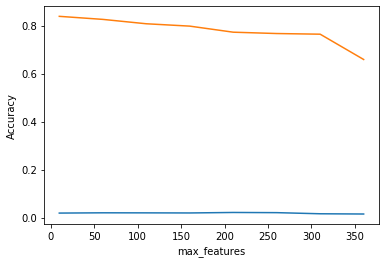

In [93]:
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_score_time"],label="Training accuracy")
plt.plot(scores["param_min_samples_split"],scores["mean_test_score"],label="Test accuracy")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [94]:
rf = RandomForestClassifier(n_estimators = 350 , max_depth = 6 , min_samples_leaf = 20 , max_features = 28 , min_samples_split = 60)
rf.fit(x_train , y_train)

y_pred_rf = rf.predict(x_test)

ac_rf = accuracy_score(y_test , y_pred_rf)
print(ac_rf*100)

83.24022346368714


### AdaBoostClassifier

In [95]:
shallow_tree = DecisionTreeClassifier(max_depth=2)
shallow_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
estimators = list(range(10 , 1000, 50))


abc_scores_est = []
for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator=shallow_tree  , n_estimators = n_est)
    
    ABC.fit(x_train, y_train)
    y_pred_est = ABC.predict(x_test)
    score = accuracy_score(y_test, y_pred_est)
    abc_scores_est.append(score)
    

In [97]:
print(np.max(abc_scores_est)*100)

81.56424581005587


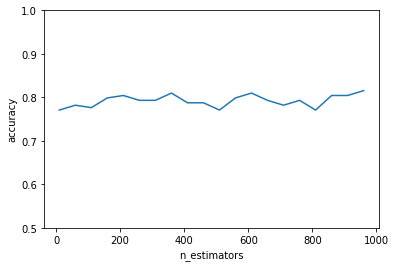

In [98]:
plt.plot(estimators, abc_scores_est)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.50, 1])
plt.show()

In [99]:
learn_rate = {'learning_rate': [0.001 , 0.01 , 0.1 , 1.0 , 1.3]}

In [100]:
ABC = AdaBoostClassifier(base_estimator=shallow_tree)
grid_search_lr = GridSearchCV(ABC, cv = folds , param_grid = learn_rate , return_train_score = True , n_jobs = -1)
grid_search_lr.fit(x_train, y_train)
print('Best parameter for min_samples_leaf: ',grid_search_lr.best_params_)

Best parameter for min_samples_leaf:  {'learning_rate': 0.01}


In [101]:
ABC = AdaBoostClassifier(base_estimator = shallow_tree , learning_rate = 0.01 , n_estimators = 350)
ABC.fit(x_train , y_train)
y_pred_ab = ABC.predict(x_test)
ac_ab = accuracy_score(y_test, y_pred_ab)
print(ac_ab*100)

82.68156424581005


### GBDT

In [102]:
sub_sample = {"subsample": [0.3, 0.6, 0.9]}

GBC = GradientBoostingClassifier()

grd_search_ss = GridSearchCV(GBC , cv = folds , param_grid = sub_sample , n_jobs = -1)
grd_search_ss.fit(x_train, y_train)
print('Best parameter for max_depth: ',grd_search_ss.best_params_)

Best parameter for max_depth:  {'subsample': 0.9}


In [103]:
GBC = GradientBoostingClassifier(max_depth = 6 , subsample = 0.6 , learning_rate = 0.01 , n_estimators=350 , max_features = 28 , min_samples_leaf = 20 , min_samples_split = 60)
GBC.fit(x_train , y_train)

y_gbr = GBC.predict(x_test)

ac_gbr = accuracy_score(y_test, y_gbr)
print(ac_gbr*100)

83.24022346368714


In [104]:
f1=pd.DataFrame({'importance':GBC.feature_importances_},index=x.columns)
f1.sort_values('importance',ascending=False)

,importance
Title,0.302438
Sex,0.182137
Fare,0.136265
Age,0.089928
Pc_3,0.079487
LargeF,0.040527
Cabin_X,0.040198
Fsize,0.039003
SibSp,0.016602
Embarked,0.014683


## Prepare Kaggle Test Dataset.

In [105]:
train_dataset.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Fsize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC',
       'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4',
       'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP',
       'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2',
       'T_SWPP', 'T_WC', 'T_WEP', 'T_X', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [106]:
new_test = test_dataset.drop(['PassengerId'] , axis = 1)
new_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [107]:
new_test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [108]:
new_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Fill the missing value

In [109]:
index_NaN_age = list(new_test["Age"][new_test["Age"].isnull()].index)
for i in index_NaN_age :
    age_med = new_test["Age"].median()
    age_pred = new_test["Age"][((new_test['SibSp'] == new_test.iloc[i]["SibSp"]) & 
                                     (new_test['Parch'] == new_test.iloc[i]["Parch"]) & 
                                     (new_test['Pclass'] == new_test.iloc[i]["Pclass"]))].median()
    
    if not np.isnan(age_pred) :
        new_test['Age'].iloc[i] = age_pred
    else :
        new_test['Age'].iloc[i] = age_med;

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


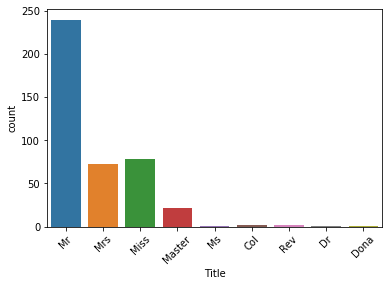

In [110]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in new_test["Name"]]
new_test["Title"] = pd.Series(dataset_title)
new_test["Title"].head()

g = sns.countplot(x="Title",data = new_test)
g = plt.setp(g.get_xticklabels(), rotation=45)

new_test["Title"] = new_test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
new_test["Title"] = new_test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
new_test["Title"] = new_test["Title"].astype(int)

new_test.drop(labels = ["Name"], axis = 1, inplace = True)

In [111]:
new_test["Fsize"] = new_test["SibSp"] + train_dataset["Parch"] + 1

new_test['Single'] = new_test['Fsize'].map(lambda s: 1 if s == 1 else 0)
new_test['SmallF'] = new_test['Fsize'].map(lambda s: 1 if  s == 2  else 0)
new_test['MedF'] = new_test['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
new_test['LargeF'] = new_test['Fsize'].map(lambda s: 1 if s >= 5 else 0)

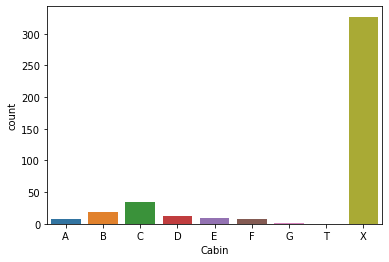

In [112]:
new_test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in new_test['Cabin'] ])
np.unique(new_test['Cabin'])
g = sns.countplot(new_test["Cabin"],order=['A','B','C','D','E','F','G','T','X'])
new_test = pd.get_dummies(new_test, columns = ["Cabin"] , prefix="Cabin")

In [113]:
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fsize,...,MedF,LargeF,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
0,3,male,34.5,0,0,330911,7.8292,Q,2,1.0,...,0,0,0,0,0,0,0,0,0,1
1,3,female,47.0,1,0,363272,7.0000,S,1,2.0,...,0,0,0,0,0,0,0,0,0,1
2,2,male,62.0,0,0,240276,9.6875,Q,2,1.0,...,0,0,0,0,0,0,0,0,0,1
3,3,male,27.0,0,0,315154,8.6625,S,2,1.0,...,0,0,0,0,0,0,0,0,0,1
4,3,female,22.0,1,1,3101298,12.2875,S,1,2.0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
new_test.shape

(418, 22)

In [115]:
Ticket = []
for i in list(new_test.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
new_test["Ticket"] = Ticket
new_test["Ticket"].head()

0    X
1    X
2    X
3    X
4    X
Name: Ticket, dtype: object

In [116]:
new_test = pd.get_dummies(new_test , columns = ["Ticket"] , prefix="T")

In [117]:
new_test.shape

(418, 49)

In [118]:
new_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,Single,...,T_SOC,T_SOPP,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X
0,3,male,34.5,0,0,7.8292,Q,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,female,47.0,1,0,7.0000,S,1,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,male,62.0,0,0,9.6875,Q,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,male,27.0,0,0,8.6625,S,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,female,22.0,1,1,12.2875,S,1,2.0,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
new_test["Pclass"] = new_test["Pclass"].astype("category")
new_test = pd.get_dummies(new_test , columns = ["Pclass"] , prefix="Pc")

In [120]:
new_test.shape

(418, 51)

In [121]:
new_test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,Single,SmallF,...,T_SOTONOQ,T_STONO,T_STONO2,T_STONOQ,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,male,34.5,0,0,7.8292,Q,2,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,female,47.0,1,0,7.0000,S,1,2.0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,male,62.0,0,0,9.6875,Q,2,1.0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,male,27.0,0,0,8.6625,S,2,1.0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,female,22.0,1,1,12.2875,S,1,2.0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [122]:
new_test["Embarked"] = new_test["Embarked"].fillna("S")
new_test["Embarked"] = new_test["Embarked"].map({"C": 0, "Q":1 , "S":2})


new_test["Sex"] = new_test["Sex"].map({"male": 0, "female":1})


new_test["Fare"] = new_test["Fare"].fillna(new_test["Fare"].median())

In [123]:
new_test.isnull().sum()

Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
Fsize        0
Single       0
SmallF       0
MedF         0
LargeF       0
Cabin_A      0
Cabin_B      0
Cabin_C      0
Cabin_D      0
Cabin_E      0
Cabin_F      0
Cabin_G      0
Cabin_X      0
T_A          0
T_A4         0
T_A5         0
T_AQ3        0
T_AQ4        0
T_C          0
T_CA         0
T_FC         0
T_FCC        0
T_LP         0
T_PC         0
T_PP         0
T_SC         0
T_SCA3       0
T_SCA4       0
T_SCAH       0
T_SCPARIS    0
T_SCParis    0
T_SOC        0
T_SOPP       0
T_SOTONO2    0
T_SOTONOQ    0
T_STONO      0
T_STONO2     0
T_STONOQ     0
T_WC         0
T_WEP        0
T_X          0
Pc_1         0
Pc_2         0
Pc_3         0
dtype: int64

In [124]:
new_test.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Fsize',
       'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'T_A', 'T_A4',
       'T_A5', 'T_AQ3', 'T_AQ4', 'T_C', 'T_CA', 'T_FC', 'T_FCC', 'T_LP',
       'T_PC', 'T_PP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_WC', 'T_WEP', 'T_X', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [125]:
train_dataset.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Fsize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_X', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC',
       'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA4',
       'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP',
       'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2',
       'T_SWPP', 'T_WC', 'T_WEP', 'T_X', 'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [126]:
train_dataset.shape

(891, 56)

In [127]:
new_test.shape

(418, 51)

### Dropping column which are not in train and test side.

In [128]:
final_dataset = train_dataset
final_test = new_test

In [129]:
final_dataset = final_dataset.drop(['Cabin_T' , 'T_AS' , 'T_CASOTON' , 'T_Fa' , 'T_LINE' , 'T_SOP' , 'T_PPP' , 'T_SCOW' , 'T_SP' , 'T_SWPP'] , axis = 1)
final_test = final_test.drop(['T_A' , 'T_AQ3' , 'T_AQ4' , 'T_LP' , 'T_SCA3' , 'T_STONOQ'] , axis = 1)

In [130]:
print(final_dataset.shape)
print(final_test.shape)

(891, 46)
(418, 45)


In [131]:
final_dataset.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'Fsize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X',
       'T_A4', 'T_A5', 'T_C', 'T_CA', 'T_FC', 'T_FCC', 'T_PC', 'T_PP', 'T_SC',
       'T_SCA4', 'T_SCAH', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOPP',
       'T_SOTONO2', 'T_SOTONOQ', 'T_STONO', 'T_STONO2', 'T_WC', 'T_WEP', 'T_X',
       'Pc_1', 'Pc_2', 'Pc_3'],
      dtype='object')

In [132]:
final_test.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Fsize',
       'Single', 'SmallF', 'MedF', 'LargeF', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'T_A4', 'T_A5',
       'T_C', 'T_CA', 'T_FC', 'T_FCC', 'T_PC', 'T_PP', 'T_SC', 'T_SCA4',
       'T_SCAH', 'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_STONO', 'T_STONO2', 'T_WC', 'T_WEP', 'T_X', 'Pc_1',
       'Pc_2', 'Pc_3'],
      dtype='object')

In [133]:
final_dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fsize,Single,...,T_SOTONO2,T_SOTONOQ,T_STONO,T_STONO2,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0,0,22.0,1,0,7.2500,2,2,2,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,2,1,1,1,...,0,0,0,1,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,1,2,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,2,2,1,1,...,0,0,0,0,0,0,1,0,0,1


In [134]:
x = final_dataset.drop(['Survived'] , axis = 1)
y = final_dataset['Survived']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 90)

In [135]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [136]:
GBC = GradientBoostingClassifier(max_depth = 6 , subsample = 0.6 , learning_rate = 0.01 , n_estimators=350 , max_features = 28 , min_samples_leaf = 20 , min_samples_split = 60)
GBC.fit(x_train , y_train)

y_gbr = GBC.predict(final_test)

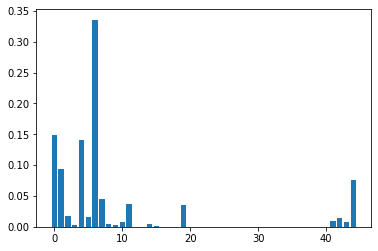

In [137]:
plt.bar(range(len(GBC.feature_importances_)), GBC.feature_importances_)
plt.show()

In [138]:
submission = pd.DataFrame({
        "PassengerId": test_dataset["PassengerId"],
        "Survived": y_gbr
    })

submission.to_csv('limontitanic01.csv', index=False)